<a href="https://colab.research.google.com/github/Adogamm/preparacion_datos/blob/main/manejo_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.2 PREPARACIÓN DE LOS DATOS
## EXTRACCIÓN DE CONOCIMIENTOS DE BASES DE DATOS

<br>

### PROFESOR: SALVADOR HERNÁNDEZ MENDOZA

### INTEGRANTES
* ADOLFO LEÓN BARRÓN
* FERNANDO HERNÁNDEZ VÁZQUEZ
* NAZARETH MUÑOZ RUIZ

### Ejercicio:
0. Formar un equipo de 3 integrantes máximo y realizar las actividades.
1. Crear una libreta de jupyter en Colab y realizar el análisis del dataset anexo.
3. Crear un repositorio de github con el nombre de la materia.
4. Almacenar la libreta de jupyter en el repositorio creado.
5. Realizar el reporte de su practica.





**Importación de librerias**

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt

**Nota:**  Antes de poder leer los datos es necesario subir el archivo "ecommerce_costumers.csv"

**Leer e importar los datos**

In [3]:
files.upload()

Saving ecommerce_customers.csv to ecommerce_customers.csv


{'ecommerce_customers.csv': b'Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent\r\nmstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.49726773,12.65565115,39.57766802,4.082620633,587.951054\r\nhduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.92627203,11.10946073,37.26895887,2.664034182,392.2049334\r\npallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, DC 99414-7564",Bisque,33.00091476,11.33027806,37.11059744,4.104543202,487.5475049\r\nriverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.30555663,13.71751367,36.72128268,3.120178783,581.852344\r\nmstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 37242-1057",MediumAquaMarine,33.33067252,12.79518855,37.5366533,4.446308318,599.406092\r\nalvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 67218-7250",FloralWhite,33.87103788,12.0269

**Implementación de pandas** Para poder usar el archivo .csv se implementará pandas, que nos permitirá convertir el archivo csv en un DataFrame como se muestra a continuación.

In [4]:
df = pd.read_csv('ecommerce_customers.csv')
print(df.head)

<bound method NDFrame.head of                              Email  ... Yearly Amount Spent
0        mstephenson@fernandez.com  ...          587.951054
1                hduke@hotmail.com  ...          392.204933
2                 pallen@yahoo.com  ...          487.547505
3          riverarebecca@gmail.com  ...          581.852344
4    mstephens@davidson-herman.com  ...          599.406092
..                             ...  ...                 ...
495   lewisjessica@craig-evans.com  ...          573.847438
496            katrina56@gmail.com  ...          529.049004
497             dale88@hotmail.com  ...          551.620146
498            cwilson@hotmail.com  ...          456.469510
499      hannahwilson@davidson.com  ...          497.778642

[500 rows x 8 columns]>


Una vez llegado a este punto se analizó toda la información a la que teniamos acceso, por lo cual despues de una breve discución se decidieron las columnas y filas que se iban a utilizar.

**Definir filas y columnas**

In [5]:
print(df.columns)

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')


In [6]:
df.describe()

Avg. Session Length  ...  Yearly Amount Spent
count           500.000000  ...           500.000000
mean             33.053194  ...           499.314038
std               0.992563  ...            79.314782
min              29.532429  ...           256.670582
25%              32.341822  ...           445.038277
50%              33.082008  ...           498.887875
75%              33.711985  ...           549.313828
max              36.139662  ...           765.518462

[8 rows x 5 columns]

In [7]:
df

Email  ... Yearly Amount Spent
0        mstephenson@fernandez.com  ...          587.951054
1                hduke@hotmail.com  ...          392.204933
2                 pallen@yahoo.com  ...          487.547505
3          riverarebecca@gmail.com  ...          581.852344
4    mstephens@davidson-herman.com  ...          599.406092
..                             ...  ...                 ...
495   lewisjessica@craig-evans.com  ...          573.847438
496            katrina56@gmail.com  ...          529.049004
497             dale88@hotmail.com  ...          551.620146
498            cwilson@hotmail.com  ...          456.469510
499      hannahwilson@davidson.com  ...          497.778642

[500 rows x 8 columns]

Para determinar que tipo de aplicación se debería de implementar, se utilizaron las siguientes columnas:

1. **Avatar:** Esta columna se utiliza para determinar a que usuario le pertenece cada uno de los valores que se van a utilizar-
1. **Time on App & Time on Website:** Estas columnas se decidieron utilizar por que son las que encuentran una mayor relación con la problematica planteada.

In [8]:
pd.DataFrame(df, columns = ["Avatar", "Time on App", "Time on Website"])

Avatar  Time on App  Time on Website
0              Violet    12.655651        39.577668
1           DarkGreen    11.109461        37.268959
2              Bisque    11.330278        37.110597
3         SaddleBrown    13.717514        36.721283
4    MediumAquaMarine    12.795189        37.536653
..                ...          ...              ...
495               Tan    13.566160        36.417985
496     PaleVioletRed    11.695736        37.190268
497          Cornsilk    11.499409        38.332576
498              Teal    12.391423        36.840086
499       DarkMagenta    12.418808        35.771016

[500 rows x 3 columns]

Se obtuvo el promedio del uso de ambas columnas que se seleccionaron para este ejercicio, de esta forma el equipo pudo determinar que tipo de aplicación sería más conveniente para su implementación.

In [9]:
df['Time on App'].mean()

12.052487936928012

In [10]:
df['Time on Website'].mean()

37.059788368076156

## **RESULTADOS**

Una vez realizada la actividad el equipo determinó que **los esfuerzos se deben de enfocar más en la parte del desarrollo de la aplicación web**, esto debido a que los usuarios utilizan en promedio más del doble del tiempo la aplicación web sobre la aplicación móvil, por lo tanto es el área donde la experiencia del usuario debe de ser considerada para esa parte.

Sin embargo, de igual forma dentro del equipo se comentó que se podría trabajar más en la aplicación móvil y de esta forma los usuarios se sientan atraidos a utilizar dicha aplicación.

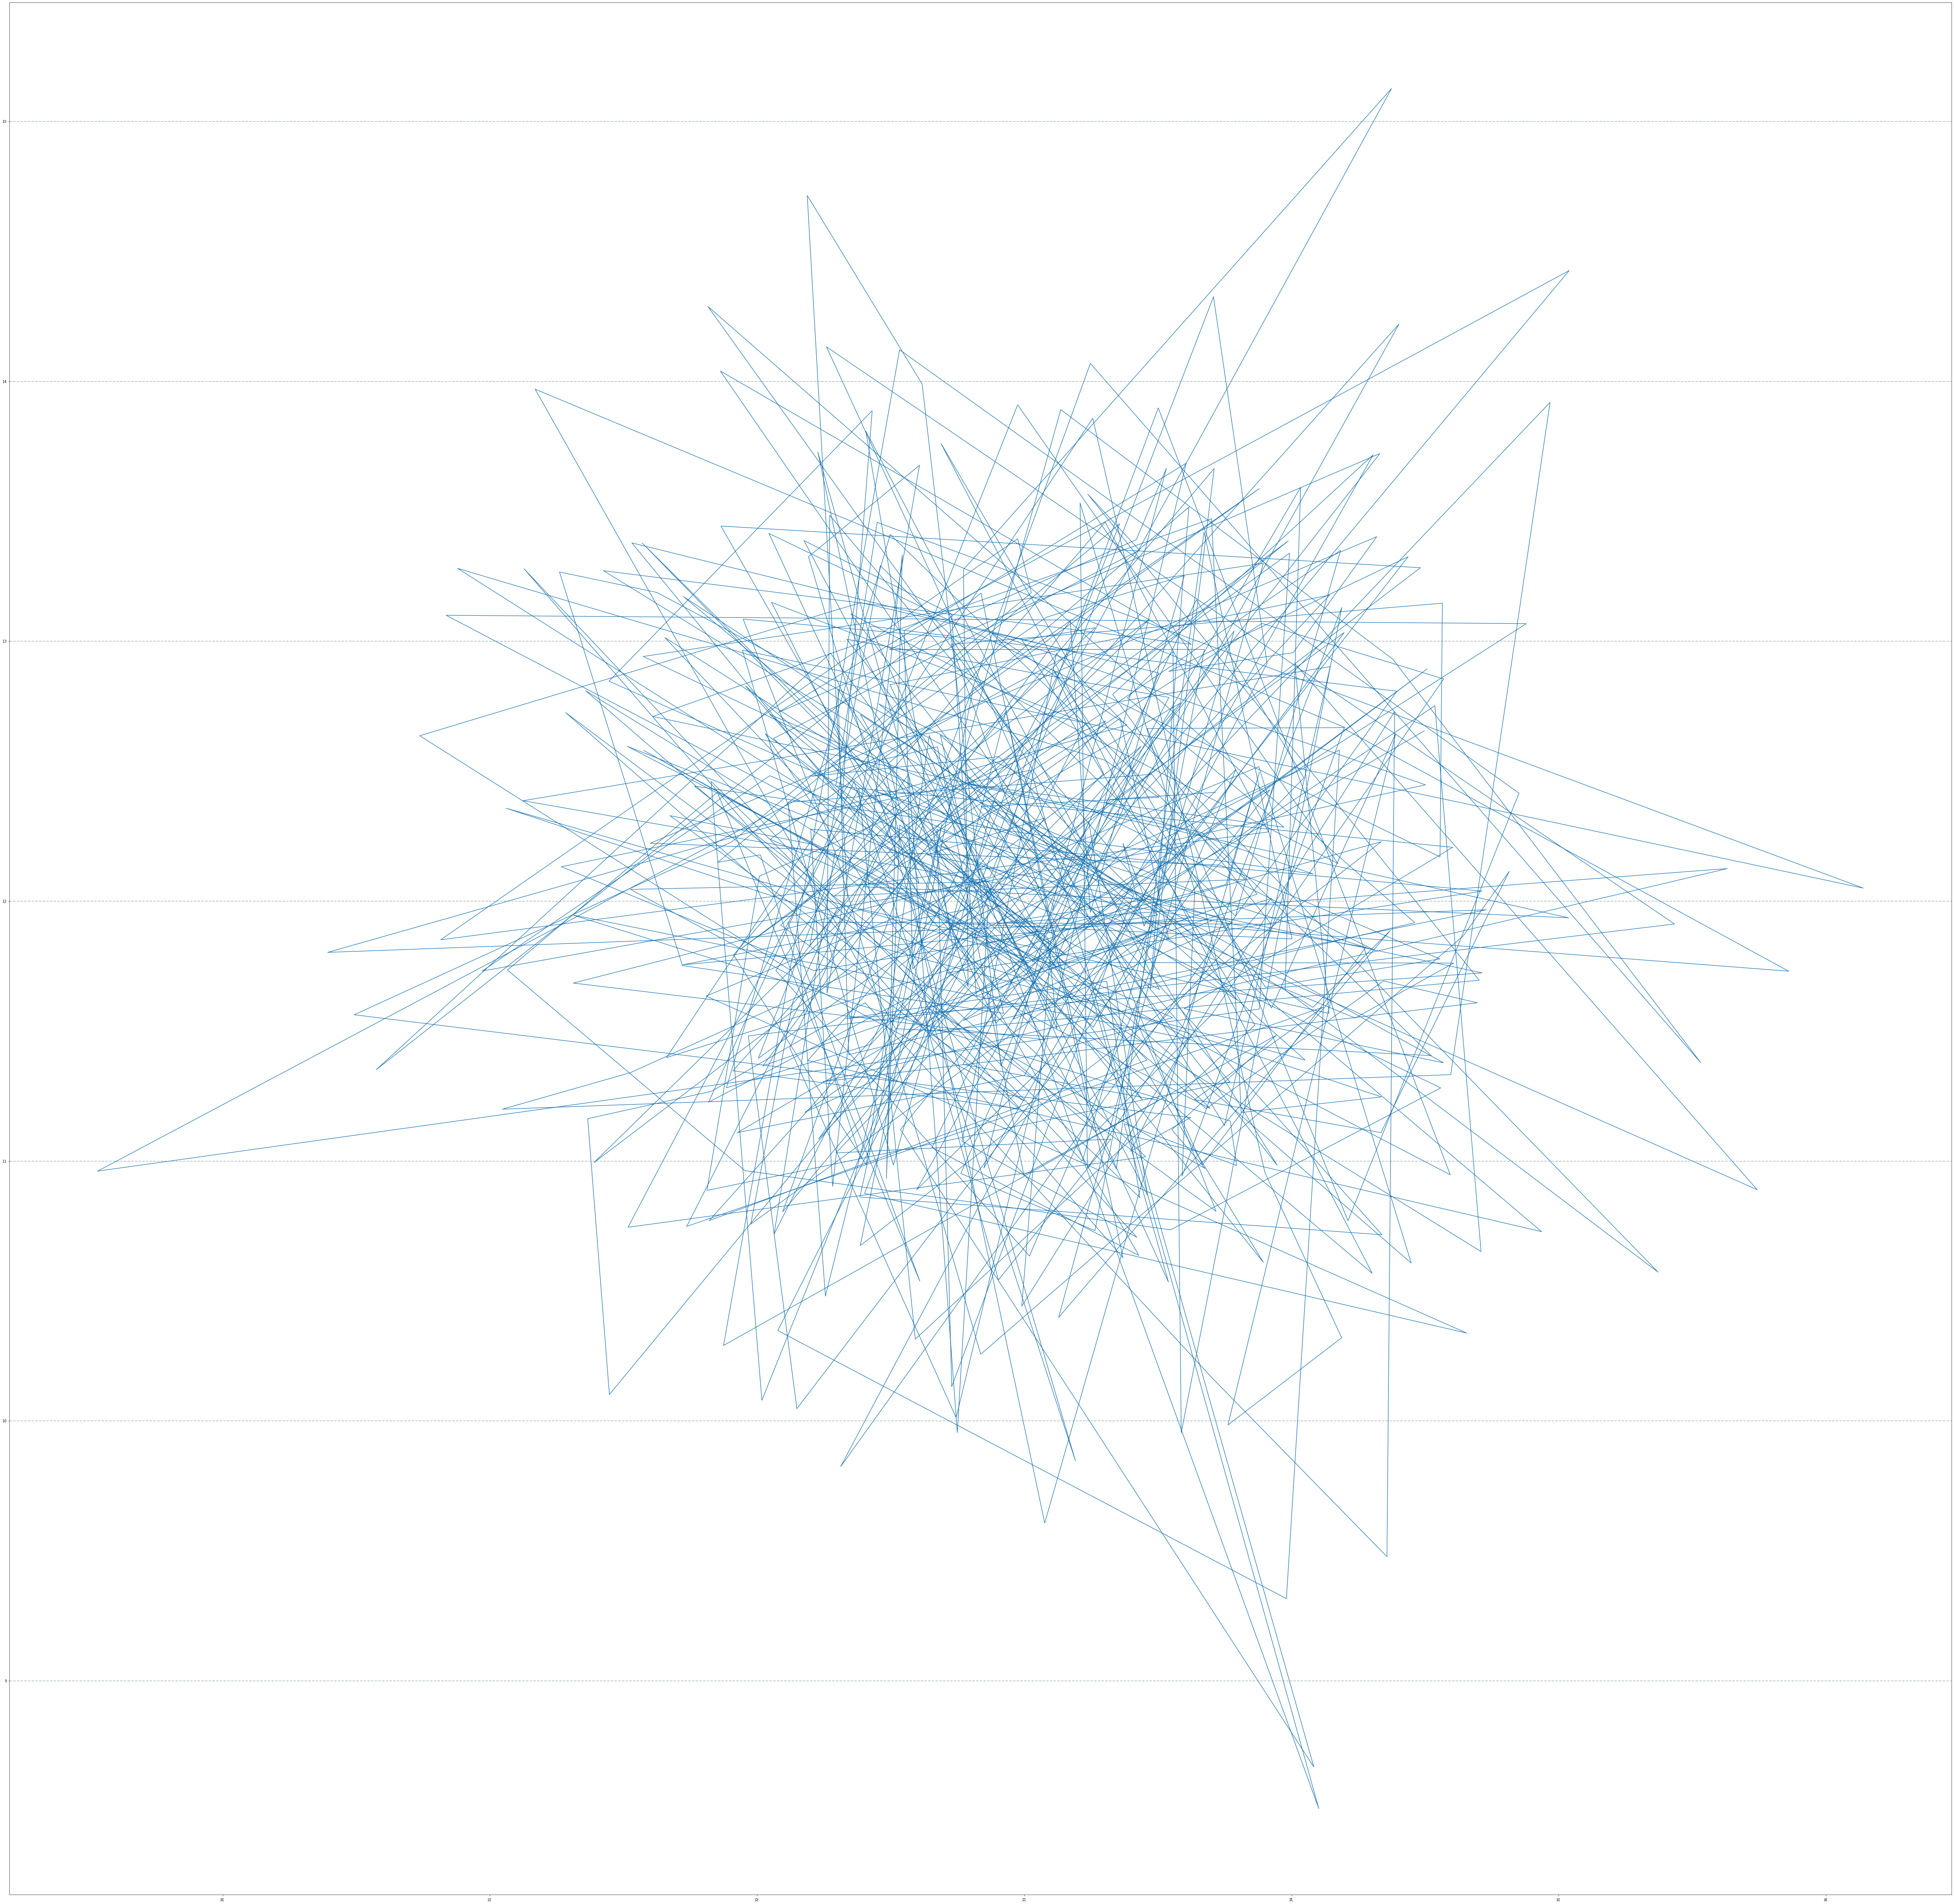

In [ ]:
plt.figure(figsize=(100,100))
x = df['Avg. Session Length']
y = df['Time on App']

plt.plot(x,y)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)
plt.show()